In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import ast
import re

Открываем датасеты

In [2]:
df_vk = pd.read_csv('VK_data.csv', index_col=0) # есть пустой столбец
df_ok = pd.read_csv('OK_data.csv')

Настройка стилей

In [3]:
font_path = 'TinkoffSans-Regular.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

plt.rcParams.update({"figure.dpi": 250})

custom = {"grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)

# Общая информация

Датасеты содержат информацию о пользователях HTML-5 игр в ВК и Одноклассниках

In [4]:
df_vk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020898 entries, 0 to 1084533
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_id             1020898 non-null  int64  
 1   age                    1020898 non-null  int64  
 2   sex                    1020898 non-null  int64  
 3   friends                1020898 non-null  int64  
 4   heavy_vk_platform      1020898 non-null  object 
 5   vk_platforms_array     1020898 non-null  object 
 6   days_in_vk             1020898 non-null  int64  
 7   avg_daily_ts           1020898 non-null  float64
 8   days_in_feed           1020898 non-null  int64  
 9   avg_daily_ts_feed      934251 non-null   float64
 10  days_in_clips          1020898 non-null  int64  
 11  avg_daily_ts_clips     653905 non-null   float64
 12  days_in_video          1020898 non-null  int64  
 13  avg_daily_ts_video     775201 non-null   float64
 14  days_in_messages       

In [5]:
df_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448216 entries, 0 to 448215
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    447418 non-null  float64
 1   sex                    448216 non-null  int64  
 2   friends                418969 non-null  float64
 3   heavy_ok_platform      448216 non-null  object 
 4   ok_platforms_array     448216 non-null  object 
 5   days_in_ok             448216 non-null  int64  
 6   avg_daily_ts           448216 non-null  float64
 7   days_in_feed           418228 non-null  float64
 8   avg_daily_ts_feed      418228 non-null  float64
 9   days_in_clips          66918 non-null   float64
 10  avg_daily_ts_clips     66918 non-null   float64
 11  days_in_video          248315 non-null  float64
 12  avg_daily_ts_video     248189 non-null  float64
 13  days_in_messages       220374 non-null  float64
 14  avg_daily_ts_messages  220374 non-nu

In [6]:
df_vk.describe()

,country_id,age,sex,friends,days_in_vk,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,avg_daily_ts_clips,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,final_cluster
count,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,934251.000000,1.020898e+06,653905.000000,1.020898e+06,775201.000000,1.020898e+06,868431.000000,1.020898e+06,56262.000000,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06
mean,1.110879e+01,3.103372e+01,1.475691e+00,1.492424e+02,1.900231e+01,2.465287e+03,1.649066e+01,824.902671,7.030948e+00,557.957392,7.282587e+00,1080.990825,1.228411e+01,389.946668,3.049648e-01,1124.346348,2.363958e-01,5.220557e-02,4.659834e+00,8.167330e+00
std,3.871220e+01,1.736320e+01,5.002438e-01,4.657268e+02,1.101728e+01,3.670053e+03,1.181452e+01,1317.074512,9.130400e+00,1128.292276,8.308504e+00,2622.306000,1.131563e+01,1073.695139,2.382813e+00,2747.938094,1.724557e+01,1.095166e+00,1.911437e+01,7.434304e+00
min,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.800000e+01,1.000000e+00,4.000000e+00,8.000000e+00,2.691650e+02,4.000000e+00,59.040000,0.000000e+00,36.900000,1.000000e+00,37.310000,1.000000e+00,28.167000,0.000000e+00,9.840000,0.000000e+00,0.000000e+00,1.146732e-02,0.000000e+00
50%,1.000000e+00,2.800000e+01,1.000000e+00,5.100000e+01,2.300000e+01,1.069975e+03,1.800000e+01,282.900000,2.000000e+00,126.690000,4.000000e+00,167.192143,8.000000e+00,93.357000,0.000000e+00,88.560000,0.000000e+00,0.000000e+00,8.622609e-01,7.000000e+00
75%,1.000000e+00,3.900000e+01,2.000000e+00,1.480000e+02,3.000000e+01,3.191799e+03,2.900000e+01,1044.743077,1.200000e+01,541.815000,1.200000e+01,824.100000,2.400000e+01,296.635000,0.000000e+00,927.420000,0.000000e+00,0.000000e+00,5.498382e+00,1.300000e+01
max,2.320000e+02,1.190000e+02,2.000000e+00,1.000000e+04,3.000000e+01,1.026687e+05,3.000000e+01,40278.728000,3.000000e+01,30804.120000,3.000000e+01,146057.580000,3.000000e+01,60114.446000,3.000000e+01,57211.482000,8.658889e+03,2.550108e+02,8.392882e+03,2.500000e+01


In [7]:
df_ok.describe()

,age,sex,friends,days_in_ok,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,avg_daily_ts_clips,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_ok
count,447418.000000,448216.000000,418969.000000,448216.000000,448216.000000,418228.000000,418228.000000,66918.000000,66918.000000,248315.000000,2.481890e+05,220374.000000,220374.000000,53299.000000,53299.000000,2618.000000,31497.000000,380401.000000
mean,41.980658,1.403147,164.384028,14.828772,1756.491658,14.253567,643.166386,2.840163,707.515036,5.517516,2.688226e+02,6.695604,219.982243,12.158915,3191.400252,130.494198,1.454471,2.719377
std,16.436358,0.490530,276.454694,10.910997,3461.016157,10.699170,963.602636,3.271772,1248.605896,5.704995,3.464084e+03,7.547274,635.221406,11.520833,5698.371050,491.594192,3.998001,42.558725
min,1.000000,1.000000,1.000000,1.000000,1.230000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.080000,0.000000,0.000000
25%,31.000000,1.000000,43.000000,4.000000,296.430000,4.000000,107.920000,1.000000,36.900000,1.000000,8.300000e+00,2.000000,33.210000,1.000000,86.100000,9.510000,0.020000,0.080000
50%,40.000000,1.000000,106.000000,14.000000,729.800000,13.000000,322.180000,2.000000,239.230000,3.000000,2.122000e+01,4.000000,80.200000,7.000000,780.440000,32.170000,0.150000,0.500000
75%,53.000000,2.000000,204.000000,26.000000,1771.200000,25.000000,790.322500,3.000000,872.690000,8.000000,6.027000e+01,8.000000,188.680000,25.000000,4001.165000,105.610000,0.910000,1.860000
max,119.000000,2.000000,6021.000000,30.000000,269997.300000,30.000000,37986.610000,30.000000,39093.310000,30.000000,1.084428e+06,30.000000,42859.010000,30.000000,93219.770000,20266.320000,88.150000,20266.380000


# Возрастные группы

Проверка пустых значений

In [8]:
print(f"Null значения возрастов в ВК - {df_vk['age'].isnull().sum()}")
print(f"Null значения возрастов в ОК - {df_ok['age'].isnull().sum()}")

Null значения возрастов в ВК - 0
Null значения возрастов в ОК - 798


Null значений в датасете ОК менее 0.2% поэтому имеет смысл удалить записи

In [9]:
df_ok.dropna(subset=['age'], inplace=True)

Разбиение на группы

In [10]:
bins = [0, 12, 18, 25, 30, 40, 50, 60, 120]
labels = ['0-12', '12-18', '18-25', '25-30', '30-40', '40-50', '50-60', '60-120']
df_vk['age_group'] = pd.cut(df_vk['age'], bins=bins, labels=labels, right=True)
df_ok['age_group'] = pd.cut(df_ok['age'], bins=bins, labels=labels, right=True)

Построение графиков

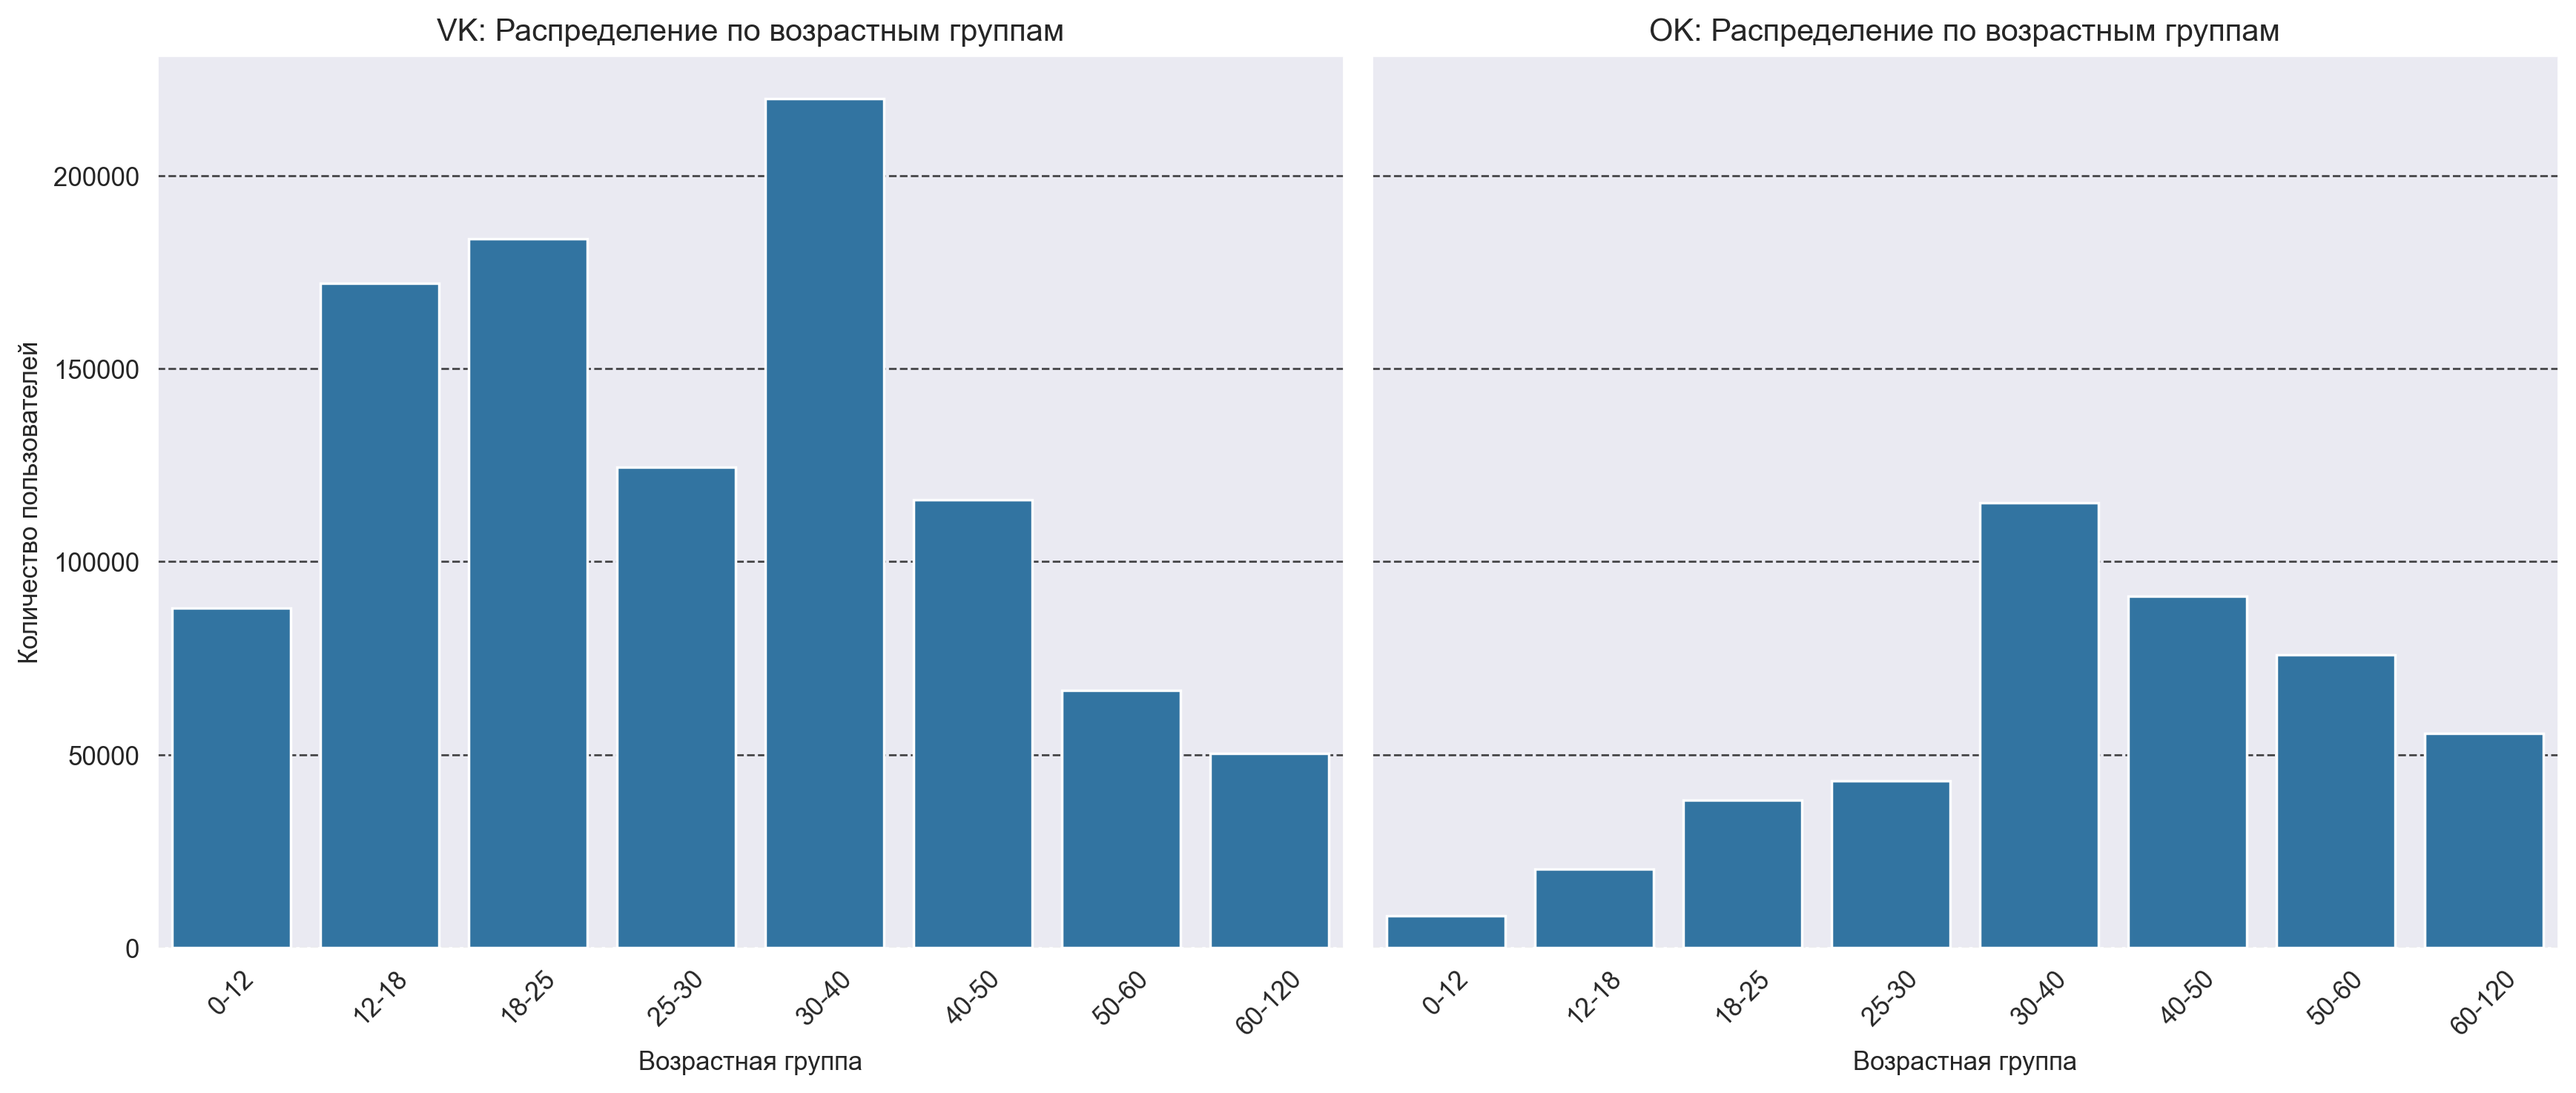

In [11]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# VK
sns.countplot(data=df_vk, x='age_group', order=labels, ax=axes[0], zorder=2)
axes[0].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[0].set_xlabel('Возрастная группа')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('VK: Распределение по возрастным группам')
axes[0].tick_params(axis='x', rotation=45)

# OK
sns.countplot(data=df_ok, x='age_group', order=labels, ax=axes[1], zorder=2)
axes[1].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[1].set_xlabel('Возрастная группа')
axes[1].set_title('OK: Распределение по возрастным группам')
axes[1].tick_params(axis='x', rotation=45)

# Настраиваем расположение графиков
plt.tight_layout()
plt.show()

* У ВК более молодая аудитория, однако и в ВК и в ОК наиболее многочисленная группа - от 30 до 40 лет

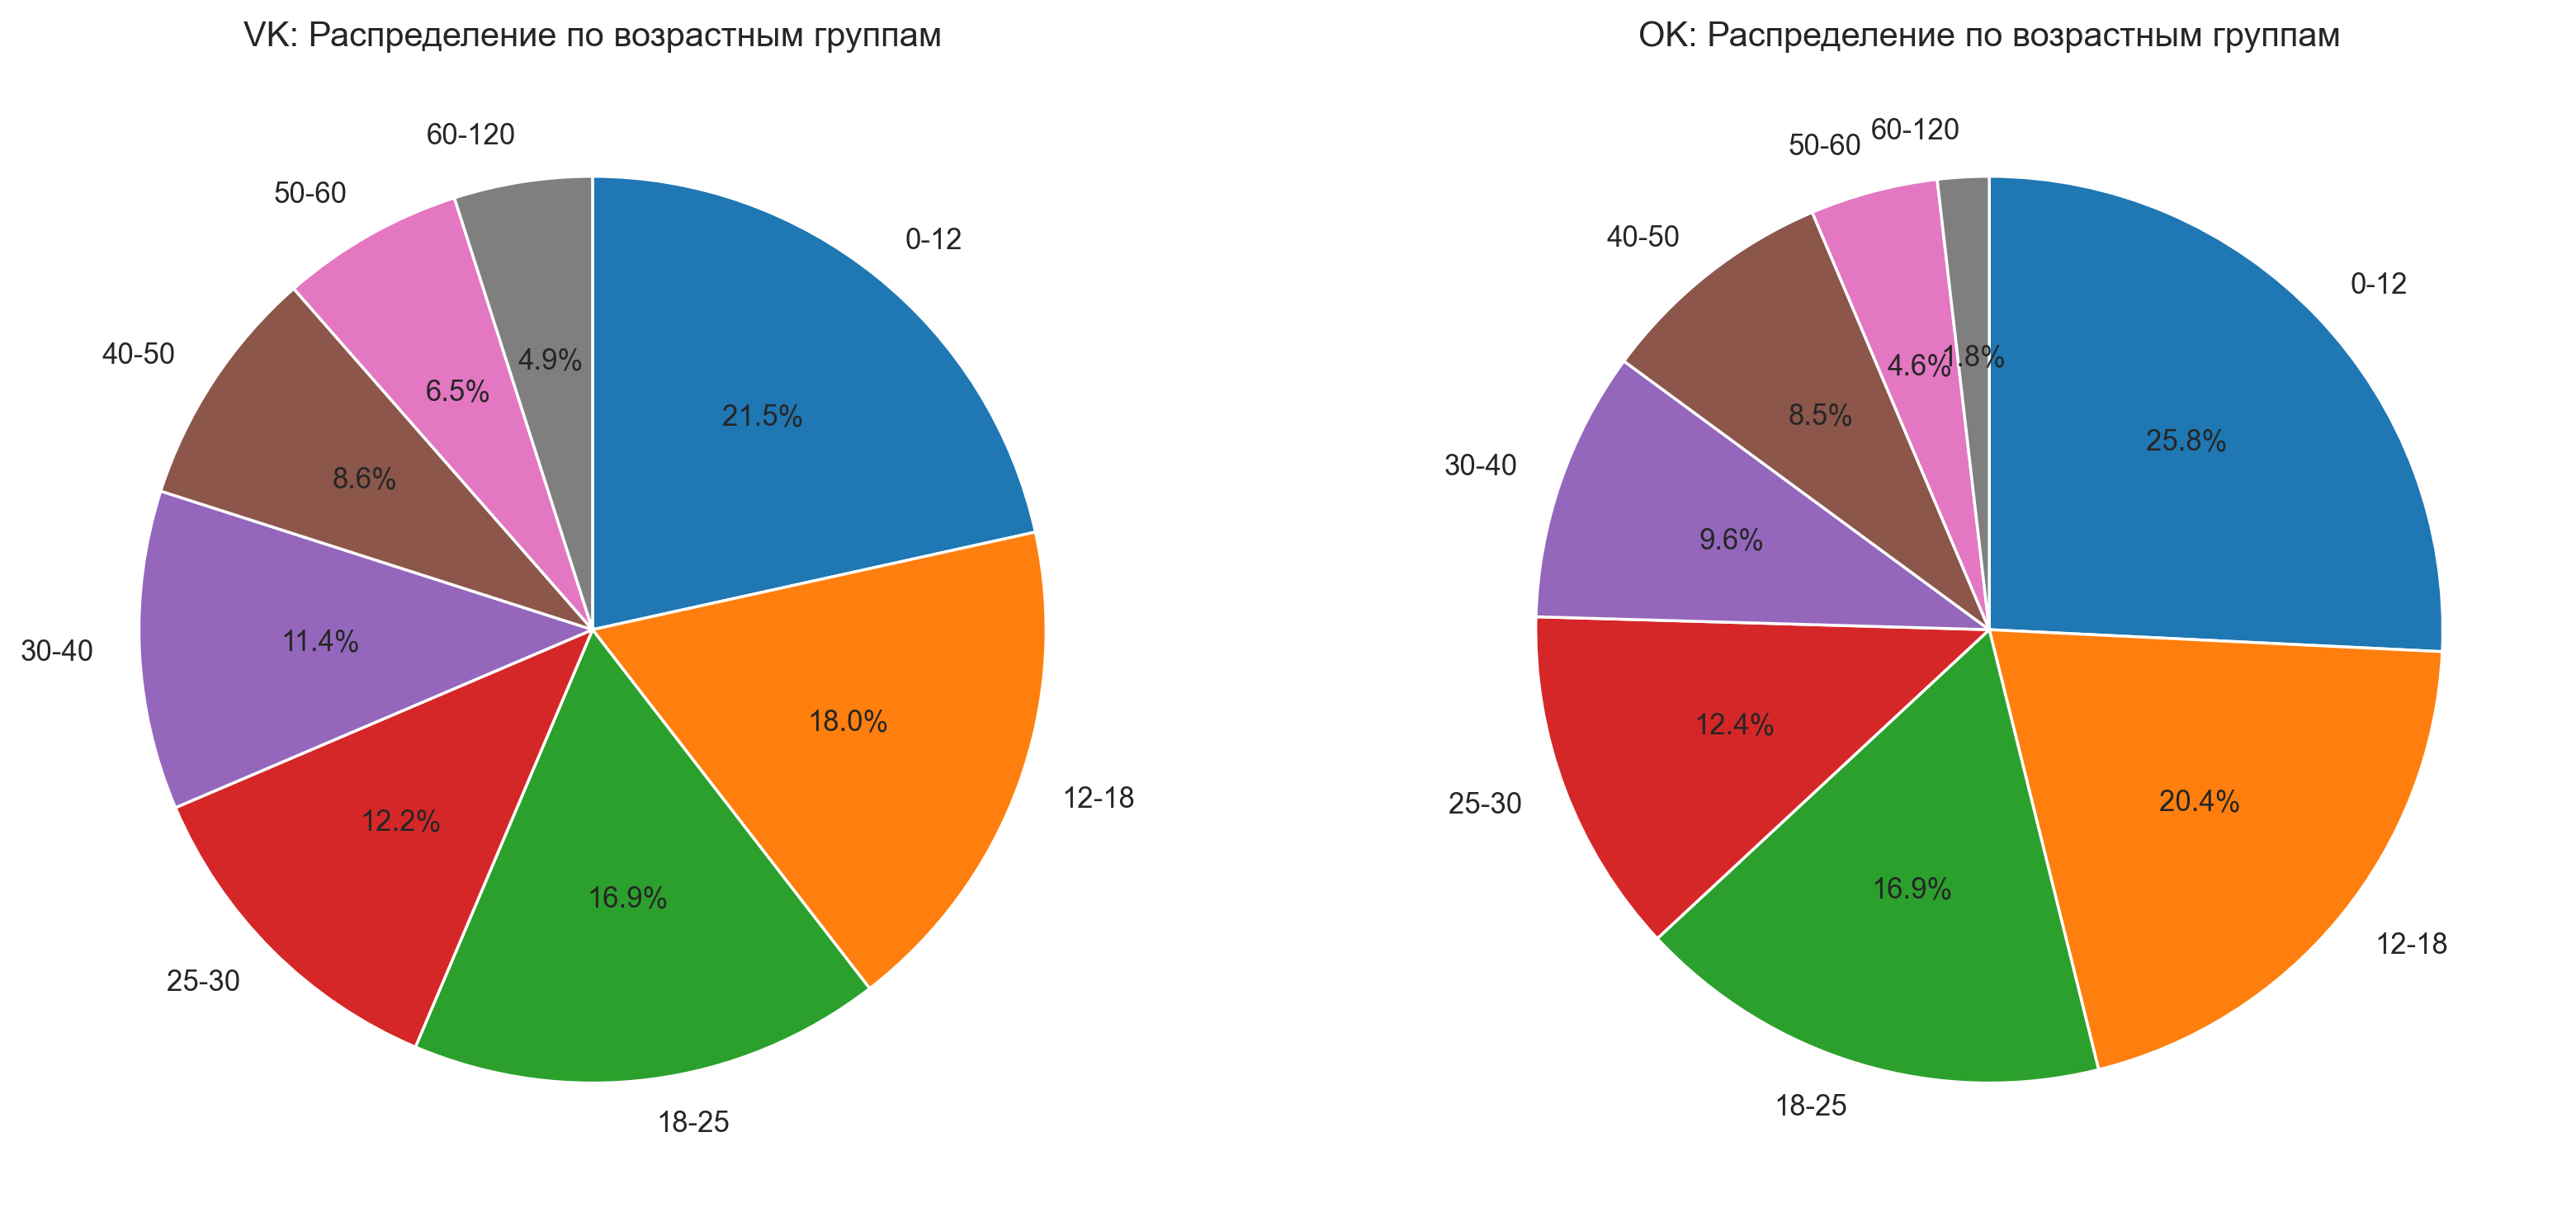

In [12]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# VK
counts_vk = df_vk['age_group'].value_counts()
axes[0].pie(
    counts_vk, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[0].set_title('VK: Распределение по возрастным группам')

# OK
counts_ok = df_ok['age_group'].value_counts()
axes[1].pie(
    counts_ok, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[1].set_title('OK: Распределение по возрастным группам')

# Настраиваем расположение графиков
plt.tight_layout()
plt.show()

* Около 56% аудитории ВК младше 25 лет
* Ключевая аудитория - дети, подростки и молодежь до 25 лет

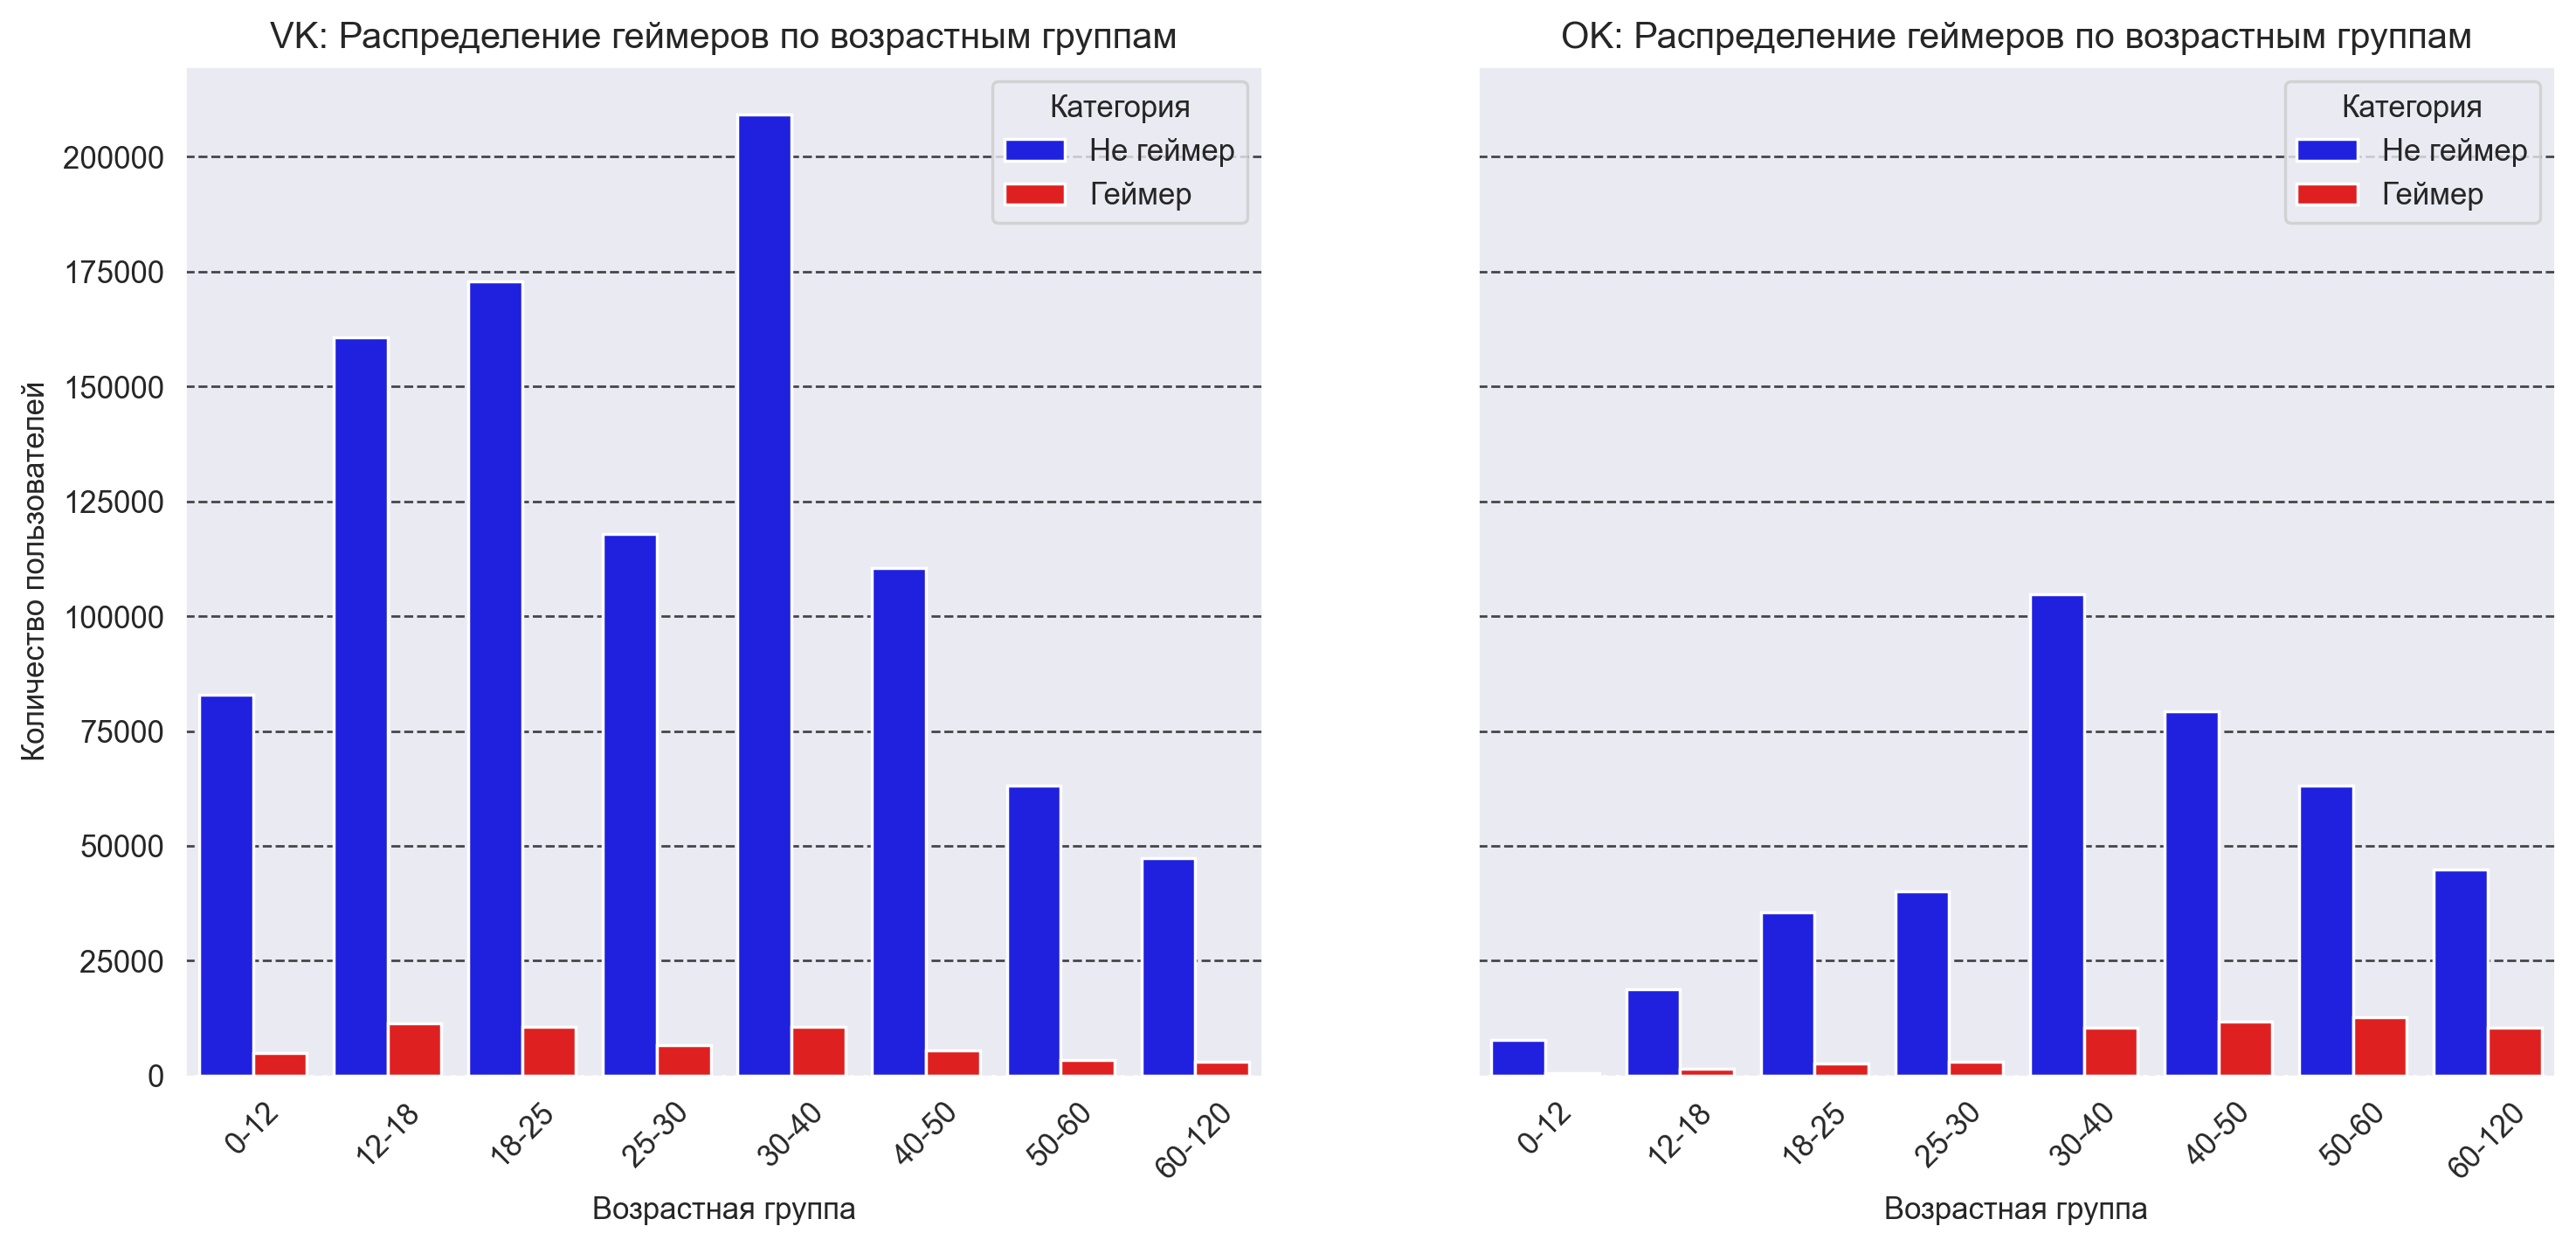

In [13]:
# Добавляем колонку с флагом геймера 
df_vk['is_gamer'] = df_vk['days_in_games'] > 0
df_ok['is_gamer'] = df_ok['days_in_games'] > 0

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Строим график
sns.countplot(data=df_vk, x='age_group', hue='is_gamer', ax=axes[0], palette={False: 'blue', True: 'red'})
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xlabel('Возрастная группа')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('VK: Распределение геймеров по возрастным группам')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Категория', labels=['Не геймер', 'Геймер'])

sns.countplot(data=df_ok, x='age_group', hue='is_gamer', ax=axes[1], palette={False: 'blue', True: 'red'})
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Возрастная группа')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_title('OK: Распределение геймеров по возрастным группам')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Категория', labels=['Не геймер', 'Геймер'])

plt.show()

* В ВК большая часть попробовавших игры - молодежь, в то время как в ОК - взрослые и пожилые

# Платформы

Проверка нулевых значений

In [14]:
print(f"Null значения платформ в ВК - {df_vk['vk_platforms_array'].isnull().sum()}")
print(f"Null значения платформ в ОК - {df_ok['ok_platforms_array'].isnull().sum()}")

Null значения платформ в ВК - 0
Null значения платформ в ОК - 0


Уникальные значения

In [15]:
print(f"Уникальные наборы платформ VK - {df_vk['vk_platforms_array'].unique()}")
print(f"Уникальные наборы платформ OK - {df_ok['ok_platforms_array'].unique()}")

Уникальные наборы платформ VK - ["['web2', 'android', 'mvk', 'android_messenger', 'android_tv']"
 "['android']" "['web2', 'android']" ...
 "['iphone', 'ipad_v2', 'android', 'vk_video_ios', 'smart_tv', 'mvk']"
 "['iphone', 'ipad_v2', 'web2', 'android', 'vk_video_ios', 'mvk', 'vk_video_android', 'android_tv']"
 "['dating_android_client', 'android_clips', 'android', 'vk_video_android']"]
Уникальные наборы платформ OK - ['[APP_IOS]' '[APP_ANDROID]' '[APP_ANDROID, MOBILE_WEB]' '[MOBILE_WEB]'
 '[DESKTOP_WEB]' '[APP_ANDROID, DESKTOP_WEB, MOBILE_WEB]'
 '[APP_IOS, DESKTOP_WEB]' '[APP_ANDROID, DESKTOP_WEB]'
 '[DESKTOP_WEB, MOBILE_WEB]' '[APP_IOS, MOBILE_WEB]'
 '[APP_ANDROID, APP_IOS, MOBILE_WEB]' '[APP_ANDROID, APP_IOS]'
 '[APP_ANDROID, APP_IOS, DESKTOP_WEB]'
 '[APP_IOS, DESKTOP_WEB, MOBILE_WEB]'
 '[APP_ANDROID, APP_IOS, DESKTOP_WEB, MOBILE_WEB]'
 '[MOBILE_WEB, APP_ANDROID]']


Преобразуем в массивы

In [16]:
df_vk['vk_platforms_array'] = df_vk['vk_platforms_array'].apply(ast.literal_eval)
df_ok['ok_platforms_array'] = df_ok['ok_platforms_array'].apply(lambda s: [fr"{x}" for x in re.findall(r'\b([A-Z_]+)\b', s)])

Визуализируем

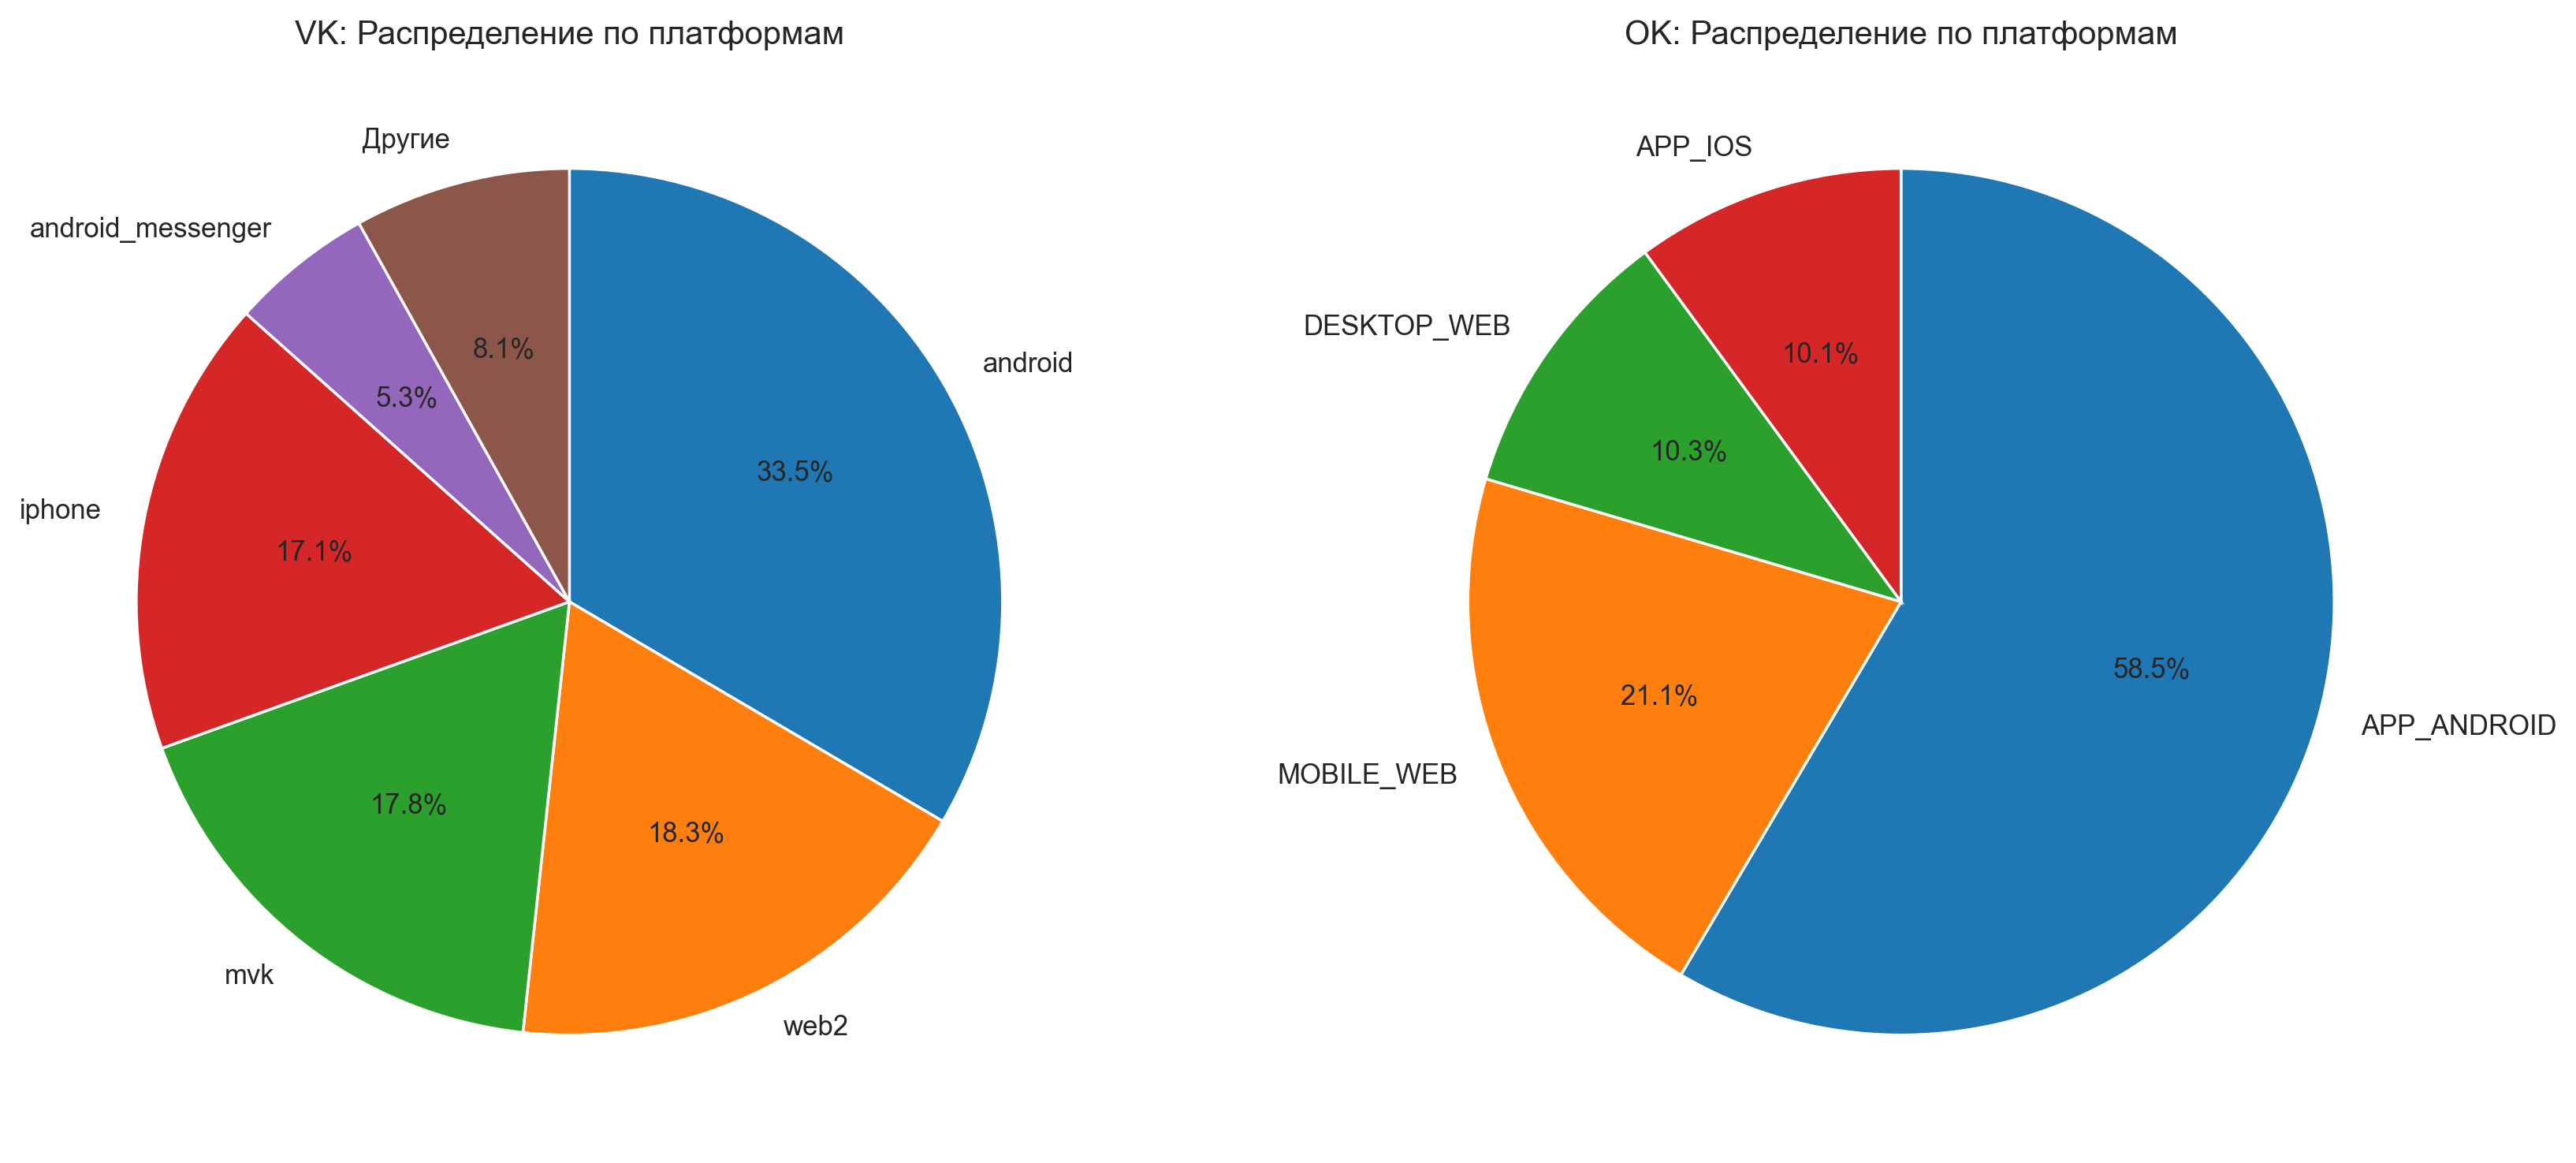

In [17]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Считаем платформы для ВК
vk_platform_counts = (
    df_vk['vk_platforms_array']
    .explode()  # Разбиваем массивы на отдельные строки
    .value_counts()  # Считаем частоту каждой платформы
)

# Выделяем топ-5 по популярности
top_5 = vk_platform_counts.head(5)
others = pd.Series([vk_platform_counts[5:].sum()], index=['Другие'])

vk_platform_counts = pd.concat([top_5, others])

# График для ВК
axes[0].pie(
    vk_platform_counts, 
    labels=vk_platform_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[0].set_title('VK: Распределение по платформам')

# Считаем платформы для ОК
ok_platform_counts = (
    df_ok['ok_platforms_array']
    .explode()  # Разбиваем массивы на отдельные строки
    .value_counts()  # Считаем частоту каждой платформы
    .head(10) # Только первые 10 
)

axes[1].pie(
    ok_platform_counts, 
    labels=ok_platform_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[1].set_title('OK: Распределение по платформам')

# Настраиваем расположение графиков
plt.tight_layout()
plt.show()

*  Ключевая платформа - Android

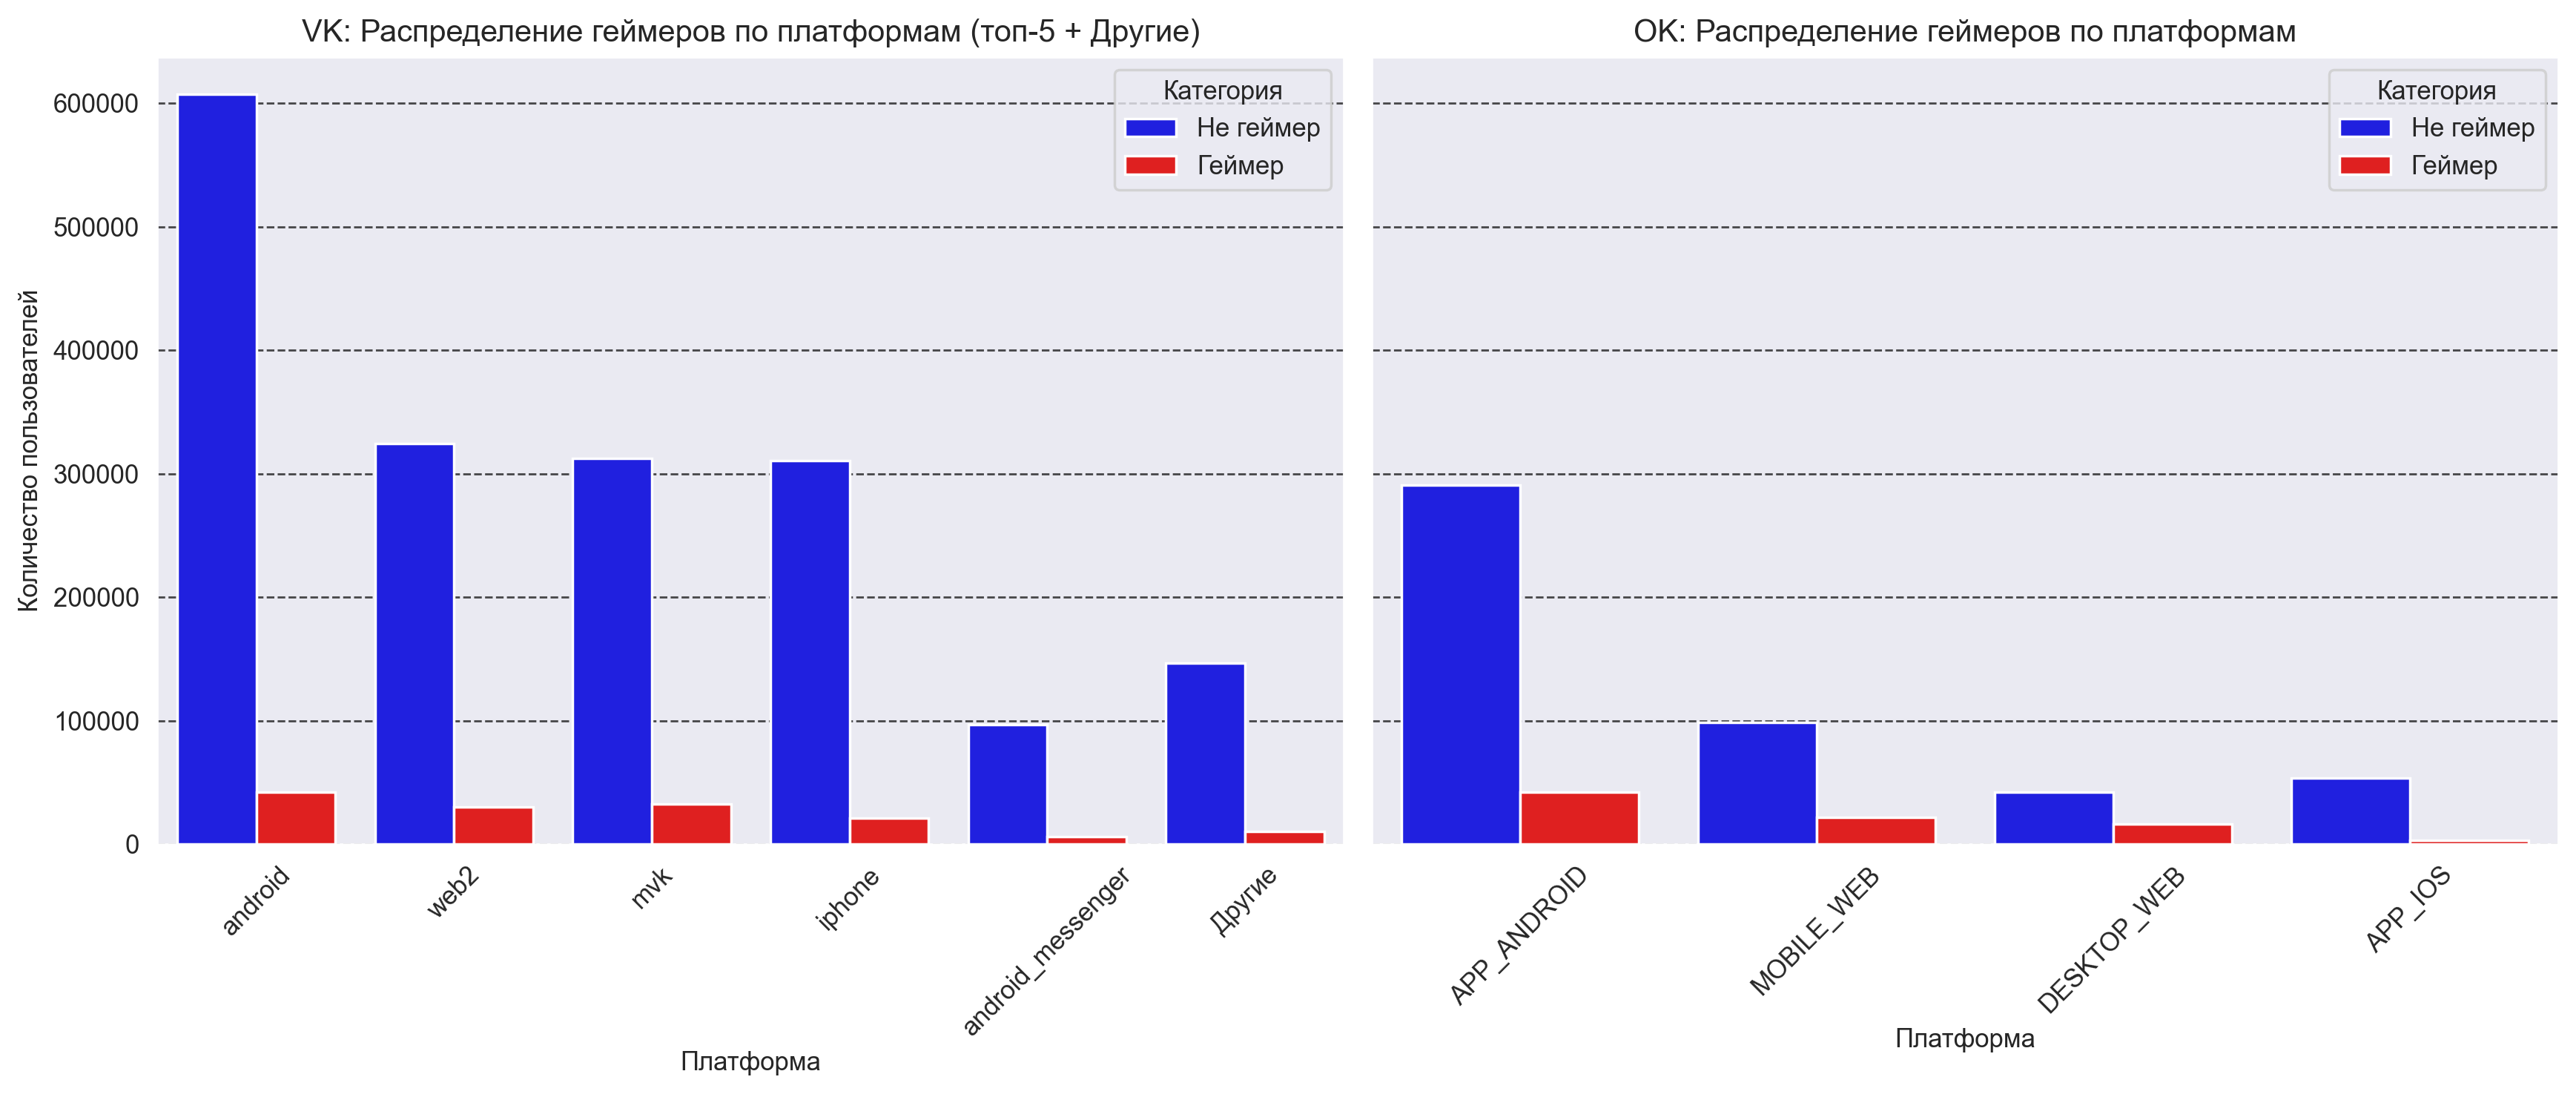

In [ ]:
# Массивы платформ в строки
df_vk_exp = df_vk.explode('vk_platforms_array').rename(columns={'vk_platforms_array': 'platform'})
df_ok_exp = df_ok.explode('ok_platforms_array').rename(columns={'ok_platforms_array': 'platform'})

# Считаем частоту платформ в ВК и определяем топ-5
vk_counts = df_vk_exp['platform'].value_counts()
top5_vk = vk_counts.nlargest(5).index

# Создаем новую колонку с топ-5 платформ
df_vk_exp['platform_grouped'] = df_vk_exp['platform'].where(df_vk_exp['platform'].isin(top5_vk), other='Другие')

# Порядок категорий
order_vk = list(top5_vk) + ['Другие']
order_ok = df_ok_exp['platform'].value_counts().index 

# Строим графики
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# VK
sns.countplot(
    data=df_vk_exp,
    x='platform_grouped',
    hue='is_gamer',
    ax=axes[0],
    palette={False: 'blue', True: 'red'},
    order=order_vk
)
axes[0].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[0].set_xlabel('Платформа')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('VK: Распределение геймеров по платформам')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Категория', labels=['Не геймер', 'Геймер'])

# OK
sns.countplot(
    data=df_ok_exp,
    x='platform',
    hue='is_gamer',
    ax=axes[1],
    palette={False: 'blue', True: 'red'},
    order=order_ok
)
axes[1].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[1].set_xlabel('Платформа')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_title('OK: Распределение геймеров по платформам')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Категория', labels=['Не геймер', 'Геймер'])

plt.tight_layout()
plt.show()

* Любимая платформа геймеров - Android. Геймеры не очень любят iOS